In [1]:
import time

from sklearn.ensemble import RandomForestClassifier

from preprocess import Preprocessing, PATH
from evaluation import get_results, get_cross_validation_scores

/Users/torokpeter/Documents/tuw/first/machine_learning/machinelearning-tuw/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The model fit took 0.1031 seconds
10-Fold CV Scores: [0.89648623 0.92200855 0.90984568 0.85642285 0.8967033  0.90984568
 0.89509036 0.84089069 0.86832612 0.85543449]
Average f1_weighted Score: 0.8851
Standard Deviation: 0.0262
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        78
           2       0.83      0.95      0.88        75
           3       1.00      1.00      1.00        42

    accuracy                           0.90       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.91      0.90      0.90       195



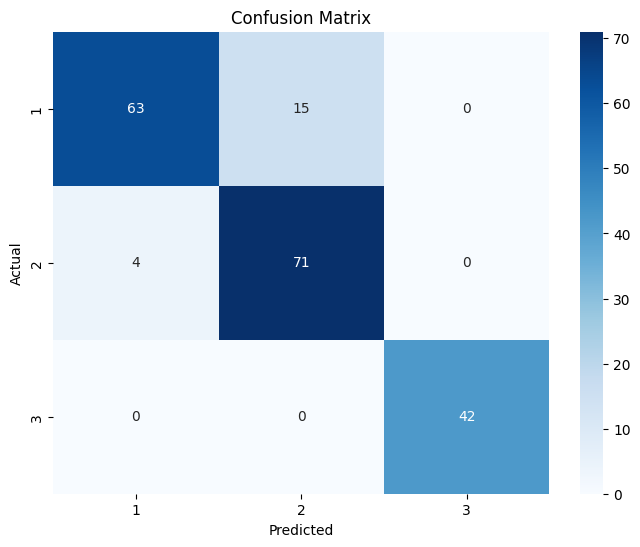

In [3]:
def random_forest_pipeline():
    """
    Simple random forest pipeline

    Loads data, fits random forest, tests relevant metrics
    """
    pp = Preprocessing()

    # random forest doesn't require scaling
    X_train, X_test, y_train, y_test = pp.pipeline(PATH, split=True, scale=False, encode_labels=False)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    t0 = time.time()
    rf_model.fit(X_train, y_train)
    t1 = time.time()

    print(f'The model fit took {t1-t0:.4f} seconds')

    y_pred = rf_model.predict(X_test)
    get_cross_validation_scores(rf_model, X_train, y_train)
    get_results(y_test, y_pred, pp.labels)

random_forest_pipeline()